first sample:
c1, tv, tv, tv, tv, tv, tv, tv, tv, c1, c2, c3, pass, sleep, 

second sample:
c1, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, c1, tv, tv, tv, tv, tv, tv, tv, tv, c1, c2, sleep, 

third sample:
c1, tv, tv, c1, tv, tv, tv, c1, c2, c3, pass, sleep, 
c1, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, c1, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, tv, c1, c2, c3, pass, sleep, 
G_t = -3.0000, gamma^k = 0.0000
Estimate after 100 episodes: [-2.84 -1.51  1.24 10.    0.79 -2.11  0.  ]
Estimate after 200 episodes: [-2.89 -1.55  1.29 10.    0.71 -2.08  0.  ]
Estimate after 300 episodes: [-2.88 -1.6   1.27 10.    0.65 -2.08  0.  ]
Estimate after 400 episodes: [-2.9  -1.65  1.25 10.    0.58 -2.08  0.  ]
Estimate after 500 episodes: [-2.9  -1.64  1.15 10.    0.55 -2.08  0.  ]
Estimate after 600 episodes: [-2.91 -1.61  1.12 10.    0.56 

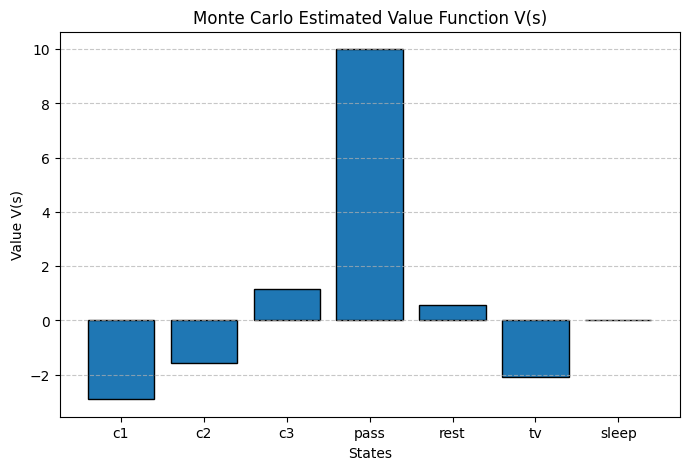

Estimate after 100 episodes: [-5.89  0.11  3.31 10.    2.35 -7.87  0.  ]
Estimate after 200 episodes: [-5.27  0.62  3.65 10.    1.62 -7.88  0.  ]
Estimate after 300 episodes: [-5.27  0.56  3.78 10.    1.69 -7.92  0.  ]
Estimate after 400 episodes: [-5.29  0.59  3.7  10.    1.74 -7.86  0.  ]
Estimate after 500 episodes: [-5.32  0.68  3.7  10.    1.8  -7.79  0.  ]
Estimate after 600 episodes: [-5.38  0.8   3.75 10.    1.9  -7.75  0.  ]
Estimate after 700 episodes: [-5.34  0.79  3.79 10.    1.8  -7.75  0.  ]
Estimate after 800 episodes: [-5.25  0.76  3.88 10.    1.9  -7.79  0.  ]
Estimate after 900 episodes: [-5.3   0.78  3.91 10.    1.84 -7.79  0.  ]
Estimate after 1000 episodes: [-5.16  0.86  3.95 10.    1.84 -7.78  0.  ]
Estimate after 1100 episodes: [-5.16  0.9   4.   10.    1.84 -7.73  0.  ]
Estimate after 1200 episodes: [-5.17  0.84  4.07 10.    1.91 -7.71  0.  ]
Estimate after 1300 episodes: [-5.22  0.87  4.06 10.    1.86 -7.69  0.  ]
Estimate after 1400 episodes: [-5.21  0.88  4.0

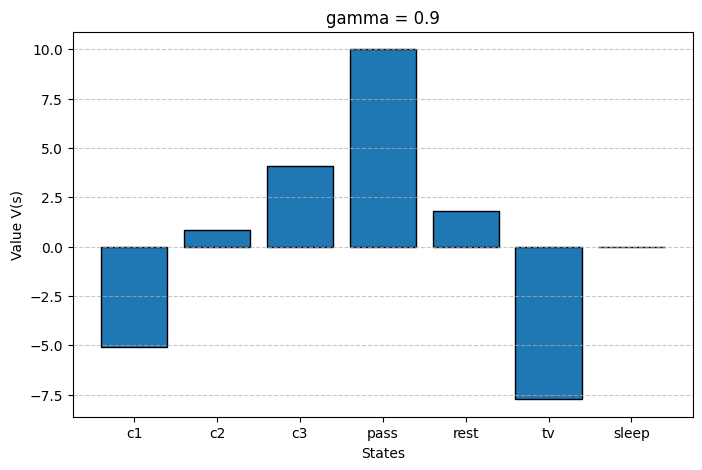

c1, c2, c3, pass, sleep, 
G_t (P2) = 1.8700
Estimate after 100 episodes: [ 4.81  1.84  5.03 10.    3.99 11.9   5.05  0.  ]
Estimate after 200 episodes: [ 4.29  1.55  4.85 10.    3.96 12.28  5.65  0.  ]
Estimate after 300 episodes: [ 4.58  1.6   4.92 10.    3.87 12.39  5.57  0.  ]
Estimate after 400 episodes: [ 4.6   1.55  4.83 10.    3.85 12.52  5.6   0.  ]
Estimate after 500 episodes: [ 4.54  1.38  4.94 10.    3.97 12.39  5.52  0.  ]
Estimate after 600 episodes: [ 4.41  1.42  4.95 10.    4.03 12.58  5.63  0.  ]
Estimate after 700 episodes: [ 4.47  1.47  5.02 10.    4.04 12.61  5.71  0.  ]
Estimate after 800 episodes: [ 4.26  1.47  4.91 10.    4.08 12.65  5.74  0.  ]
Estimate after 900 episodes: [ 4.26  1.48  4.85 10.    4.09 12.55  5.69  0.  ]
Estimate after 1000 episodes: [ 4.3   1.48  4.83 10.    4.08 12.54  5.72  0.  ]
Estimate after 1100 episodes: [ 4.31  1.47  4.91 10.    4.02 12.58  5.74  0.  ]
Estimate after 1200 episodes: [ 4.32  1.45  4.87 10.    4.02 12.61  5.8   0.  ]
Estim

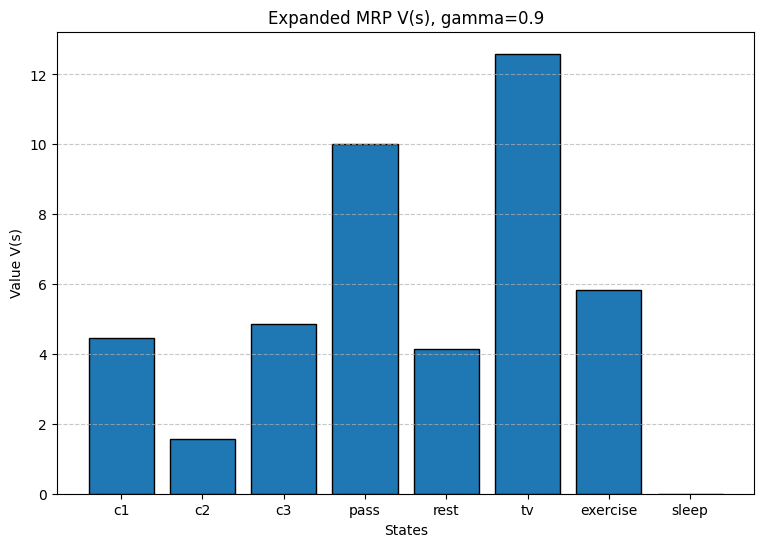

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# initialise the MRP (original)
S = ['c1', 'c2', 'c3', 'pass', 'rest', 'tv', 'sleep']
R = np.array([-2, -2, -2, +10, +1, -1, 0], dtype=float)
P = np.array([
    [0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0],
    [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.2],
    [0.0, 0.0, 0.0, 0.6, 0.4, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    [0.2, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
], dtype=float)

gamma = 0.5
assert np.allclose(np.sum(P, axis=1), 1.0)

# single sample episode generator (uses P and S passed in)
def sample_episode(P, S, s=0, log=True):
    print_str = S[s] + ', '
    episode = [s]
    while S[episode[-1]] != 'sleep':
        next_state = np.random.choice(len(P), p=P[episode[-1]])
        episode.append(int(next_state))
        print_str += S[episode[-1]] + ', '
    if log:
        print(print_str)
    return np.array(episode, dtype=int)

# Monte Carlo value estimation (first-visit / every-visit style: averages returns)
def montecarlovaluefunction(P, R, gamma, S, sample_episode_fn, num_episodes=2000):
    V = np.zeros(len(P), dtype=float)
    for i in range(num_episodes):
        for s in range(len(P)):
            episode = sample_episode_fn(P, S, s=s, log=False)   # use keyword args
            episode_reward = R[episode]
            G_t = 0.0
            for k in range(len(episode)):
                G_t += (gamma ** k) * episode_reward[k]
            V[s] += G_t
        if (i + 1) % 100 == 0:
            np.set_printoptions(precision=2, suppress=True)
            print("Estimate after {} episodes: {}".format(i + 1, V / (i + 1)))
    V = V / num_episodes
    print("Final V:", V)
    return V

def plot_value_function(V, S, figsize=(8,5), title="Monte Carlo Estimated Value Function V(s)"):
    plt.figure(figsize=figsize)
    plt.bar(S, V, edgecolor='black')
    plt.title(title)
    plt.xlabel("States")
    plt.ylabel("Value V(s)")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# quick manual sampling checks
print('first sample:')
episode = sample_episode(P, S, s=0)
print('\nsecond sample:')
episode = sample_episode(P, S, s=0)
print('\nthird sample:')
episode = sample_episode(P, S, s=0)

# compute return for one sampled episode
episode = sample_episode(P, S, s=0)
episode_reward = R[episode]
G_t = 0.0
for k in range(len(episode)):
    G_t += (gamma ** k) * episode_reward[k]
print("G_t = {:.4f}, gamma^k = {:.4f}".format(G_t, gamma ** (len(episode)-1)))

# Monte Carlo estimate on original MRP
V = montecarlovaluefunction(P, R, gamma, S, sample_episode, num_episodes=2000)
plot_value_function(V, S)

# try with a different gamma
V = montecarlovaluefunction(P, R, 0.9, S, sample_episode, num_episodes=2000)
plot_value_function(V, S, title="gamma = 0.9")

# Now the expanded MRP (S2, P2, R2) — sizes match
S2 = ['c1','c2','c3','pass','rest','tv','exercise','sleep']
R2 = np.array([-2,-2,-2,+10,+1,+2,+2,0], dtype=float)
P2 = np.array([
    [0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0],  # c1
    [0.0, 0.0, 0.8, 0.0, 0.0, 0.0, 0.0, 0.2],  # c2
    [0.0, 0.0, 0.0, 0.6, 0.4, 0.0, 0.0, 0.0],  # c3
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # pass -> sleep
    [0.2, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0],  # rest
    [0.1, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.0],  # tv
    [0.2, 0.0, 0.0, 0.0, 0.5, 0.1, 0.0, 0.2],  # exercise
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]   # sleep
], dtype=float)
assert np.allclose(np.sum(P2, axis=1), 1.0)

# sample from P2 to check
episode = sample_episode(P2, S2, s=0, log=True)
episode_reward = R2[episode]
G_t = 0.0
for k in range(len(episode)):
    G_t += (0.9 ** k) * episode_reward[k]
print("G_t (P2) = {:.4f}".format(G_t))

# Monte Carlo on expanded MRP
V2 = montecarlovaluefunction(P2, R2, 0.9, S2, sample_episode, num_episodes=2000)
plot_value_function(V2, S2, figsize=(9,6), title="Expanded MRP V(s), gamma=0.9")
